<a href="https://colab.research.google.com/github/nazarb/Machine-learning-bootcamp/blob/main/01_intro/01_pierwszy_model_sieci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
    1. [Import bibliotek](#a2)
    2. [Załadowanie i przygotowanie danych](#a3)
    3. [Eksploracja danych](#a4)
    4. [Budowa sieci neuronowej](#a5)    
    5. [Trenowanie modelu](#a6)
    6. [Ocena modelu](#a7)
    7. [Predykcja na podstawie modelu](#a8)

### <a name='a1'></a>1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

#### <a name='a2'></a> 1.1 Import bibliotek

In [ ]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

!pip uninstall -y tensorflow
!pip install -q tensorflow==2.0.0

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.15.0


### <a name='a3'></a> 1.2 Załadowanie i przygotowanie danych

In [9]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [11]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [12]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a> 1.3 Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

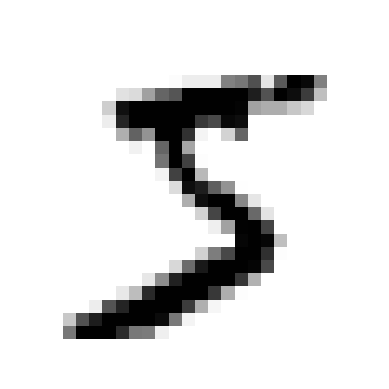

In [13]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

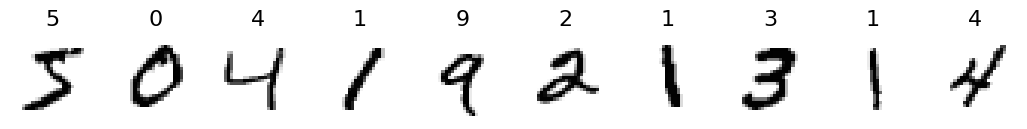

In [14]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> 1.4 Budowa sieci neuronowej

In [16]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <a name='a6'></a> 1.5 Trenowanie modelu

In [ ]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3003 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1441 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1091 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9769


### <a name='a7'></a> 1.6 Ocena modelu

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0515 - accuracy: 0.9747


[0.10237118451653514, 0.9747]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.294823,0.915167
1,0.154294,0.955767
2,0.123476,0.964267
3,0.109076,0.969867
4,0.100345,0.972983


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

### <a name='a8'></a> 1.7 Predykcja na podstawie modelu

In [ ]:
model.predict(X_test)

array([[0.000000000039, 0.            , 0.000000006711, ..., 0.9999975     , 0.000000000003, 0.000000002036],
       [0.            , 0.            , 1.            , ..., 0.            , 0.            , 0.            ],
       [0.000000265042, 0.9990945     , 0.00033088474 , ..., 0.00029027913 , 0.00019128327 , 0.000001242659],
       ...,
       [0.            , 0.000000000152, 0.000000000003, ..., 0.00000012385 , 0.00000000955 , 0.000001252068],
       [0.000000000934, 0.            , 0.            , ..., 0.            , 0.000001830195, 0.000000000005],
       [0.            , 0.            , 0.000000000001, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([8, 151, 217, 247, 259, 266, 290, 321, 359, 381], dtype='int64')

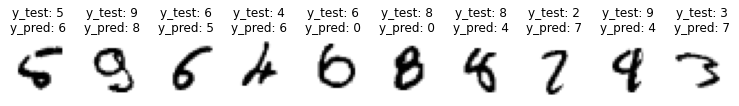

In [ ]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()